# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266019 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  266019 non-null  object 
 1   土地位置建物門牌              266019 non-null  object 
 2   交易年月日                 266019 non-null  object 
 3   建築完成年月                231997 non-null  float64
 4   建物移轉總面積平方公尺           266019 non-null  float64
 5   有無管理組織                266019 non-null  object 
 6   總價元                   266019 non-null  int64  
 7   單價元平方公尺               266019 non-null  float64
 8   備註                    78495 non-null   object 
 9   編號                    266019 non-null  object 
 10  緯度                    266019 non-null  float64
 11  經度                    266019 non-null  float64
 12  bad_count             266019 non-null  float64
 13  good_count            266019 non-null  float64
 14  建築型態清整                266019 non-null  object 
 15  

# specil-deal outliers

In [4]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   34022
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      187524
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

In [5]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', 'KDE_0.5km_x', 'KDE_1km_x', 'KDE_1.5km_x',
       'KDE_0.5km_y', 'KDE_1km_y', 'KDE_1.5km_y'],
      dtype='object')

In [6]:


# 定義備註欄位篩選關鍵字
keywords = [
    "親友、員工或其他特殊關係間之交易",
    "含增建或未登記建物",
    "建商與地主合建案",
    "(包含)公共設施保留地之交易",
    "畸零地或有合併使用之交易",
    "向政府機關承購之案件",
    "受債權債務影響或債務抵償之交易",
    "急買急賣",
    "有民情風俗因素之交易",
    "單獨車位交易",
    "土地或建物分次登記案件",
    "瑕疵物件之交易",
    "塔位或墓園"
]

# 篩選異常交易
pattern = '|'.join(keywords)
abnormal_df = df[df['備註'].str.contains(pattern, na=False)]
# abnormal_df.info()
# 獲取備註欄位中所有獨特值
unique_remarks = abnormal_df['備註'].unique()

# 將結果轉換為列表以便完整顯示
all_remarks = unique_remarks.tolist()
all_remarks
# # 篩選非異常交易
# normal_df = df[~df['備註'].str.contains(pattern, na=False)]

# # 計算異常與非異常交易的價格統計
# abnormal_price_mean = abnormal_df['單價元每坪'].mean()
# normal_price_mean = normal_df['單價元每坪'].mean()
# abnormal_price_median = abnormal_df['單價元每坪'].median()
# normal_price_median = normal_df['單價元每坪'].median()

# print(f"異常交易的平均單價: {abnormal_price_mean:.2f} 元/坪")
# print(f"非異常交易的平均單價: {normal_price_mean:.2f} 元/坪")
# print(f"異常交易的中位數單價: {abnormal_price_median:.2f} 元/坪")
# print(f"非異常交易的中位數單價: {normal_price_median:.2f} 元/坪")

# # 繪製箱形圖來比較異常與非異常交易的價格
# plt.figure(figsize=(10, 6))
# plt.boxplot(
#     [abnormal_df['單價元每坪'].dropna(), normal_df['單價元每坪'].dropna()],
#     labels=['異常交易', '非異常交易']
# )
# plt.ylabel('單價元每坪')
# plt.title('異常交易與非異常交易的價格比較')
# plt.show()



['親友、員工或其他特殊關係間之交易。；',
 '建商與地主合建案。；',
 '含增建或未登記建物。',
 '含增建或未登記建物。；包含公共設施保留地之交易。；',
 '含增建或未登記建物。；建商與地主合建案。；',
 '急買急賣。；',
 '朋友關係親友、員工或其他特殊關係間之交易。；',
 '包含公共設施保留地之交易。；',
 '含增建或未登記建物。；',
 '二親等間買賣母子親友、員工或其他特殊關係間之交易。；',
 '受債權債務影響或債務抵償之交易。；',
 '不動產以現況點交，該建物有部分裝修由買方自行處理含增建或未登記建物。；',
 '本案交易標的，原係由出賣人與買受人共同出資買受取得，茲由買受人以原價買回出賣人之應有部分。親友、員工或其他特殊關係間之交易。；',
 '二等親買賣親友、員工或其他特殊關係間之交易。；',
 '建商與地主合建案。；土地及建物分次登記案件。前案土地登記收件字號：；',
 '親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；',
 '含增建或未登記建物。；畸零地或有合併使用之交易。；瑕疵物件之交易。；',
 '含增建或未登記建物。；急買急賣。；',
 '姨姪關係親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；',
 '父子間買賣交易親友、員工或其他特殊關係間之交易。；',
 '親友、員工或其他特殊關係間之交易。；包含公共設施保留地之交易。；',
 '親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；包含公共設施保留地之交易。；受債權債務影響或債務抵償之交易。；',
 '姊弟關係親友、員工或其他特殊關係間之交易。；含增建或未登記建物。；',
 '主要用途一般事務所向政府機關承購之案件。；',
 '含增建或未登記建物、陽台外推',
 '含未保存地上建物買方負擔增值稅94萬9481元親友、員工或其他特殊關係間之交易。；',
 '單獨車位交易。；',
 '本買賣案件係屬三親等間特殊交易，其交易價格可能異於市場正常交易價格。為尊重權利人隱私權主張，地政士無法入屋現場勘查，由權利人提供建物現況格局實際資訊，供地政士申報登錄。本件買賣即雙方自行口頭約定，並無簽訂任何書面契約。親友、員工或其他特殊關係間之交易。；',
 '向政府機關承購之案件。；',
 '含增建或未登記建物。；包含公共設施保留地之交易。；畸零地或有合併

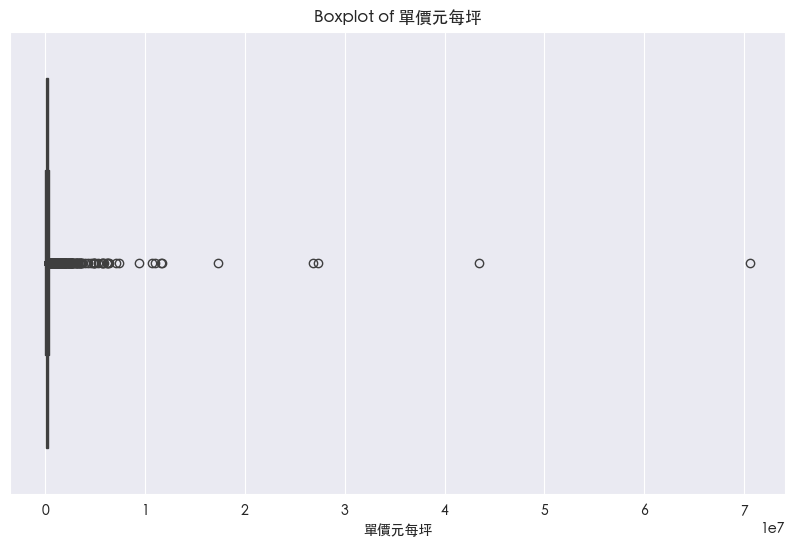

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

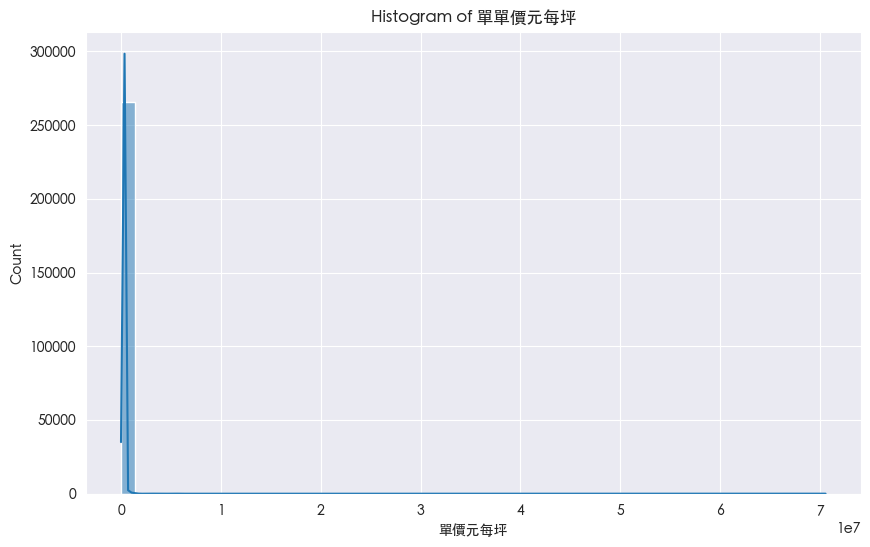

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [9]:
df_cleaned = df.drop(abnormal_df.index)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252699 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252699 non-null  object 
 1   土地位置建物門牌              252699 non-null  object 
 2   交易年月日                 252699 non-null  object 
 3   建築完成年月                218868 non-null  float64
 4   建物移轉總面積平方公尺           252699 non-null  float64
 5   有無管理組織                252699 non-null  object 
 6   總價元                   252699 non-null  int64  
 7   單價元平方公尺               252699 non-null  float64
 8   備註                    65175 non-null   object 
 9   編號                    252699 non-null  object 
 10  緯度                    252699 non-null  float64
 11  經度                    252699 non-null  float64
 12  bad_count             252699 non-null  float64
 13  good_count            252699 non-null  float64
 14  建築型態清整                252699 non-null  object 
 15  陽台有無 

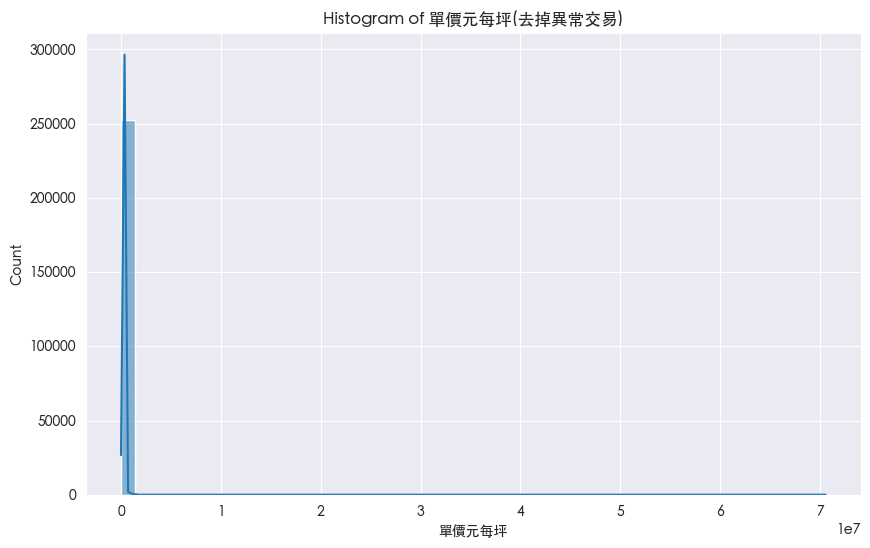

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉異常交易)')
plt.show()

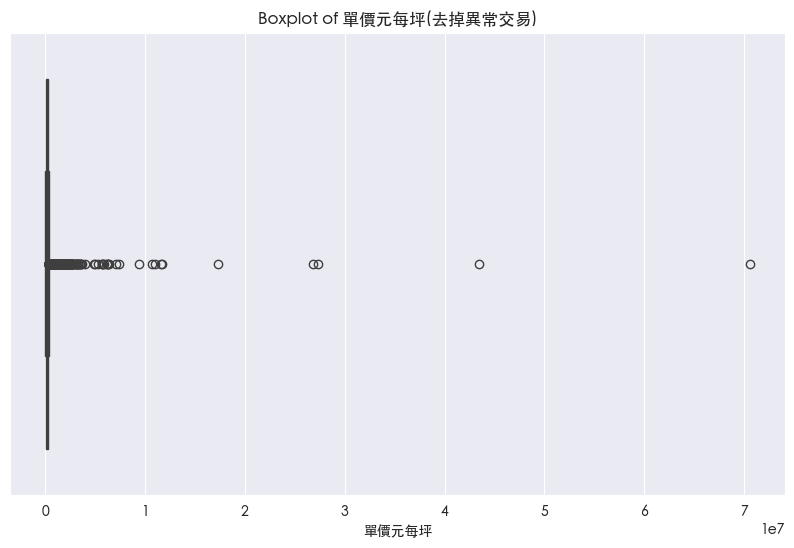

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉異常交易)')
plt.show()

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252699 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252699 non-null  object 
 1   土地位置建物門牌              252699 non-null  object 
 2   交易年月日                 252699 non-null  object 
 3   建築完成年月                218868 non-null  float64
 4   建物移轉總面積平方公尺           252699 non-null  float64
 5   有無管理組織                252699 non-null  object 
 6   總價元                   252699 non-null  int64  
 7   單價元平方公尺               252699 non-null  float64
 8   備註                    65175 non-null   object 
 9   編號                    252699 non-null  object 
 10  緯度                    252699 non-null  float64
 11  經度                    252699 non-null  float64
 12  bad_count             252699 non-null  float64
 13  good_count            252699 non-null  float64
 14  建築型態清整                252699 non-null  object 
 15  陽台有無 

In [14]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound = df_cleaned['單價元每坪'].quantile(0.025)
upper_bound = df_cleaned['單價元每坪'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent = df_cleaned[df_cleaned['單價元每坪'] <= lower_bound]

# 篩選出後 2.5% 的資料
upper_2_5_percent = df_cleaned[df_cleaned['單價元每坪'] >= upper_bound]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent)}")

前 2.5% 的資料數量: 6318
後 2.5% 的資料數量: 6319


In [15]:
# 篩選出極端值
outliers_unitPrice = df_cleaned[(df_cleaned['單價元每坪'] < lower_bound) | (df_cleaned['單價元每坪'] > upper_bound)]
# # 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
# outliers_unitPrice['單價元每坪(萬)'] = outliers_unitPrice['單價元每坪'] / 10000
print(f"極端值數量: {len(outliers_unitPrice)}")

極端值數量: 12634


In [16]:
df_cleaned_2 = df_cleaned.drop(outliers_unitPrice.index)

In [17]:
df_cleaned_2.shape

(240065, 63)

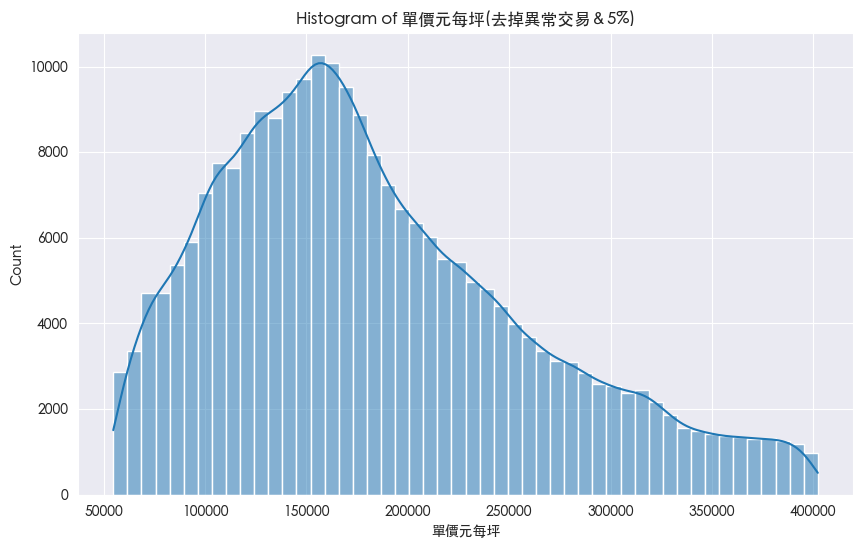

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_2['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉異常交易＆5%)')
plt.show()

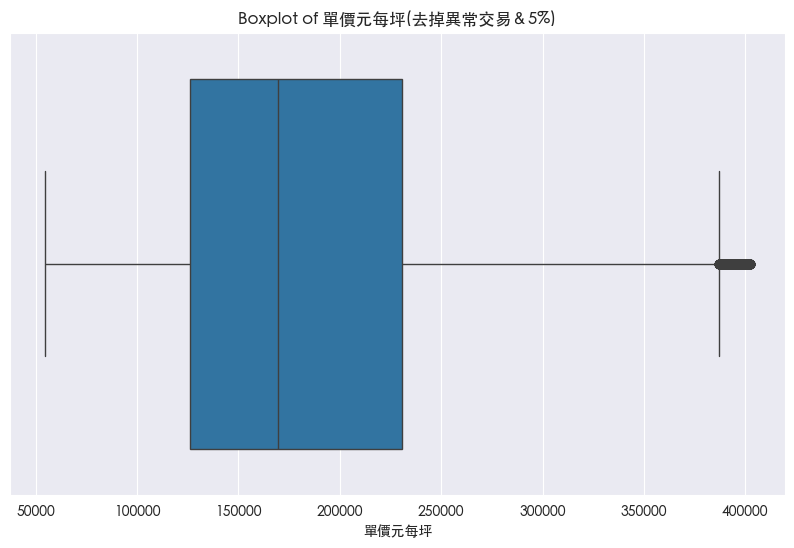

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_2['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉異常交易＆5%)')
plt.show()

In [20]:
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240065 entries, 0 to 266018
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  240065 non-null  object 
 1   土地位置建物門牌              240065 non-null  object 
 2   交易年月日                 240065 non-null  object 
 3   建築完成年月                209777 non-null  float64
 4   建物移轉總面積平方公尺           240065 non-null  float64
 5   有無管理組織                240065 non-null  object 
 6   總價元                   240065 non-null  int64  
 7   單價元平方公尺               240065 non-null  float64
 8   備註                    62036 non-null   object 
 9   編號                    240065 non-null  object 
 10  緯度                    240065 non-null  float64
 11  經度                    240065 non-null  float64
 12  bad_count             240065 non-null  float64
 13  good_count            240065 non-null  float64
 14  建築型態清整                240065 non-null  object 
 15  陽台有無 

In [21]:
df_cleaned_2.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_240065row_specialDeal_unitPrice_outlier_5percent_2024.csv',index=False)